In [1]:
import scipy.io
from scipy import interpolate
import numpy as np

def d3_scale(dat, out_range=(-1, 1), in_range=None):
    if in_range == None:
        domain = [np.min(dat, axis=0), np.max(dat, axis=0)]
    else:
        domain = in_range

    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x

    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b

    return interp(uninterp(dat))

# load the patterns from matlab
pattern_file_names = [
     "nnRawExaStride",
     "nnRawSlowWalk",
     "nnRawWalk",
     "nnRawRunJog",
     "nnRawCartWheel",
     "nnRawWaltz",
     "nnRawCrawl",
     "nnRawStandup",
     "nnRawGetdown",
     "nnRawSitting",
     "nnRawGetSeated",
     "nnRawStandupFromStool",
     "nnRawBox1",
     "nnRawBox2",
     "nnRawBox3",
]

output_dims = 61
pattern_num = 2
pattern_file_names = pattern_file_names[:2]

In [23]:
min_maxs = np.zeros((output_dims, 2))
raw_dats = []

# get the actual maximum and minimums for each dimension
for nm in pattern_file_names:
    name = nm[5:]
    raw_dats.append(scipy.io.loadmat("section2.3_demoMotionCapture/nnData/%s.mat" %(nm))["nnRawData"+name].T)
    for o_i in range(output_dims):
        assert raw_dats[-1][o_i].shape != (61,)
        min_val = np.min(raw_dats[-1][o_i])
        if min_val < min_maxs[o_i, 0]:
            min_maxs[o_i, 0] = min_val

        max_val = np.max(raw_dats[-1][o_i])
        if max_val > min_maxs[o_i, 1]:
            min_maxs[o_i, 1] = max_val

In [41]:
function_list = []

for n_i, nm in enumerate(pattern_file_names):
    # make each pattern values normalised between -1, 1
    # and temporally squash them between -1 and 1 too
    function_list.append([])
    raw_dat = raw_dats[n_i]
    xv = np.linspace(-1, 1, raw_dat.shape[1])
    assert raw_dat.shape[0] == output_dims
    normed_data = np.zeros_like(raw_dat)

    for o_i in range(output_dims):
        assert min_maxs[o_i][0] <= np.min(raw_dat[o_i, :]) 
        assert min_maxs[o_i][1] >= np.max(raw_dat[o_i, :]) 
        normed_data[o_i, :] = d3_scale(raw_dat[o_i, :], in_range=min_maxs[o_i])
        assert np.max(normed_data) <= 1.5
        assert np.min(normed_data) >= -1.5
        function_list[-1].append(interpolate.interp1d(xv, normed_data[o_i, :]))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
raw_dats[0][0].shape

(61,)

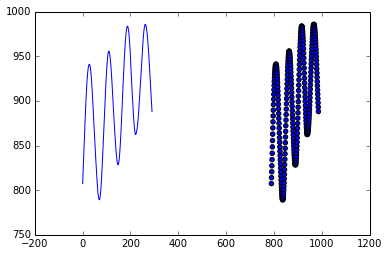

In [35]:
raw_dat = raw_dats[0][0]
xv = np.linspace(np.min(raw_dat), np.max(raw_dat), raw_dat.shape[0])
plt.scatter(xv, raw_dat)

f_approx = interpolate.interp1d(xv, raw_dat)
plt.plot(f_approx(xv))

In [43]:
len(function_list[0][0])

TypeError: object of type 'interp1d' has no len()

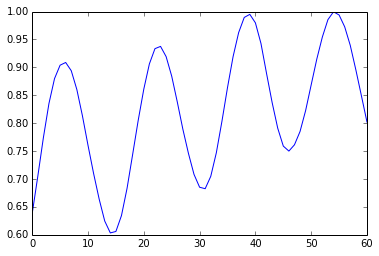

In [44]:
xv = np.linspace(-1, 1, raw_dat.shape[0])

plt.plot(function_list[0][0](xv))

In [4]:
af = scipy.io.loadmat("section2.3_demoMotionCapture/nnData/%s.mat" %(pattern_file_names[0]))

In [20]:
tmp = af['nnRawDataExaStride'].T
tmp[0].shape

(291,)